In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter('ignore')

In [2]:
df =pd.read_csv('2021_LoL_esports_match_data_from_OraclesElixir_20210504.csv', sep=';')


In [3]:
df.head()

,gameid,league,year,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t1_result,t1_kills,t1_deaths,t1_assists,t1_teamkills,t1_teamdeaths,t1_doublekills,t1_triplekills,t1_quadrakills,t1_pentakills,t1_firstblood,t1_kpm,t1_ckpm,t1_firstdragon,t1_dragons,t1_opp_dragons,t1_elementaldrakes,t1_opp_elementaldrakes,t1_infernals,t1_mountains,t1_clouds,t1_oceans,t1_elders,t1_opp_elders,t1_firstherald,t1_heralds,t1_opp_heralds,t1_firstbaron,t1_barons,t1_opp_barons,t1_firsttower,t1_towers,t1_opp_towers,t1_firstmidtower,t1_firsttothreetowers,t1_inhibitors,t1_opp_inhibitors,t1_damagetochampions,t1_dpm,t1_damagetakenperminute,t1_damagemitigatedperminute,t1_wardsplaced,t1_wpm,t1_wardskilled,t1_wcpm,t1_controlwardsbought,t1_visionscore,t1_vspm,t1_totalgold,t1_earnedgold,t1_earned gpm,t1_goldspent,t1_gspd,t1_minionkills,t1_monsterkills,t1_monsterkillsownjungle,t1_monsterkillsenemyjungle,t1_cspm,t1_goldat10,t1_xpat10,t1_csat10,t1_opp_goldat10,t1_opp_xpat10,t1_opp_csat10,t1_golddiffat10,t1_xpdiffat10,t1_csdiffat10,t1_killsat10,t1_assistsat10,t1_deathsat10,t1_opp_killsat10,t1_opp_assistsat10,t1_opp_deathsat10,t1_goldat15,t1_xpat15,t1_csat15,t1_opp_goldat15,t1_opp_xpat15,t1_opp_csat15,t1_golddiffat15,t1_xpdiffat15,t1_csdiffat15,t1_killsat15,t1_assistsat15,t1_deathsat15,t1_opp_killsat15,t1_opp_assistsat15,t1_opp_deathsat15,t2_playerid,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,t2_result,t2_kills,t2_deaths,t2_assists,t2_teamkills,t2_teamdeaths,t2_doublekills,t2_triplekills,t2_quadrakills,t2_pentakills,t2_firstblood,t2_kpm,t2_ckpm,t2_firstdragon,t2_dragons,t2_opp_dragons,t2_elementaldrakes,t2_opp_elementaldrakes,t2_infernals,t2_mountains,t2_clouds,t2_oceans,t2_elders,t2_opp_elders,t2_firstherald,t2_heralds,t2_opp_heralds,t2_firstbaron,t2_barons,t2_opp_barons,t2_firsttower,t2_towers,t2_opp_towers,t2_firstmidtower,t2_firsttothreetowers,t2_inhibitors,t2_opp_inhibitors,t2_damagetochampions,t2_dpm,t2_damagetakenperminute,t2_damagemitigatedperminute,t2_wardsplaced,t2_wpm,t2_wardskilled,t2_wcpm,t2_controlwardsbought,t2_visionscore,t2_vspm,t2_totalgold,t2_earnedgold,t2_earned gpm,t2_goldspent,t2_gspd,t2_minionkills,t2_monsterkills,t2_monsterkillsownjungle,t2_monsterkillsenemyjungle,t2_cspm,t2_goldat20,t2_xpat20,t2_csat20,t2_opp_goldat20,t2_opp_xpat20,t2_opp_csat20,t2_golddiffat20,t2_xpdiffat20,t2_csdiffat20,t2_killsat20,t2_assistsat20,t2_deathsat20,t2_opp_killsat20,t2_opp_assistsat20,t2_opp_deathsat20,t2_goldat25,t2_xpat25,t2_csat25,t2_opp_goldat25,t2_opp_xpat25,t2_opp_csat25,t2_golddiffat25,t2_xpdiffat25,t2_csdiffat25,t2_killsat25,t2_assistsat25,t2_deathsat25,t2_opp_killsat25,t2_opp_assistsat25,t2_opp_deathsat25,t1p1_position,t1p1_player,t1p1_team,t1p1_champion,t1p1_kills,t1p1_deaths,t1p1_assists,t1p1_doublekills,t1p1_triplekills,t1p1_quadrakills,t1p1_pentakills,t1p1_firstblood,t1p1_firstbloodkill,t1p1_firstbloodassist,t1p1_firstbloodvictim,ckpm,t1p1_damagetochampions,t1p1_dpm,t1p1_damageshare,t1p1_damagetakenperminute,t1p1_damagemitigatedperminute,t1p1_wardsplaced,t1p1_wpm,t1p1_wardskilled,t1p1_wcpm,t1p1_controlwardsbought,t1p1_visionscore,t1p1_vspm,t1p1_totalgold,t1p1_earnedgold,t1p1_earned gpm,t1p1_earnedgoldshare,t1p1_goldspent,t1p1_total cs,t1p1_minionkills,t1p1_monsterkills,t1p1_monsterkillsownjungle,t1p1_monsterkillsenemyjungle,t1p1_cspm,t1p1_goldat10,t1p1_xpat10,t1p1_csat10,t1p1_opp_goldat10,t1p1_opp_xpat10,t1p1_opp_csat10,t1p1_golddiffat10,t1p1_xpdiffat10,t1p1_csdiffat10,t1p1_killsat10,t1p1_assistsat10,t1p1_deathsat10,t1p1_opp_killsat10,t1p1_opp_assistsat10,t1p1_opp_deathsat10,t1p1_goldat15,t1p1_xpat15,t1p1_csat15,t1p1_opp_goldat15,t1p1_opp_xpat15,t1p1_opp_csat15,t1p1_golddiffat15,t1p1_xpdiffat15,t1p1_csdiffat15,t1p1_killsat15,t1p1_assistsat15,t1p1_deathsat15,t1p1_opp_killsat15,t1p1_opp_assistsat15,t1p1_opp_deathsat15,t1p2_position,t1p2_player,t1p2_team,t1p2_champion,t1p2_kills,t1p2_deaths,t1p2_assists,t1p2_doublekills,t1p2_triplekills,t1p2_quadrakills,t1p2_pentakills,t1p2_firstblood,t1p2_firstbloodkill,t1p2_f

In [4]:
df.shape

(4255, 887)

In [5]:
winrate = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']]
winrate

,league,t1_playerid,t1_result,t2_result,t2_playerid
0,KeSPA,DWG KIA,1.0,0.0,Nongshim RedForce
1,KeSPA,Nongshim RedForce,0.0,1.0,DWG KIA
2,KeSPA,Nongshim RedForce,0.0,1.0,DWG KIA
3,LPL,Top Esports,0.0,1.0,Suning
4,LPL,Top Esports,0.0,1.0,Suning
...,...,...,...,...,...
4250,EM,Karmine Corp,1.0,0.0,UCAM Esports Club
4251,EM,BT Excel,1.0,0.0,Karmine Corp
4252,EM,BT Excel,0.0,1.0,Karmine Corp
4253,EM,Karmine Corp,1.0,0.0,BT Excel


In [6]:
winrate.describe()

,t1_result,t2_result
count,4241.000000,4239.000000
mean,0.536194,0.464025
std,0.498747,0.498763
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [7]:
bluewin= df[df.t1_result == 1]

In [8]:
bluewin.head()

,gameid,league,year,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t1_result,t1_kills,t1_deaths,t1_assists,t1_teamkills,t1_teamdeaths,t1_doublekills,t1_triplekills,t1_quadrakills,t1_pentakills,t1_firstblood,t1_kpm,t1_ckpm,t1_firstdragon,t1_dragons,t1_opp_dragons,t1_elementaldrakes,t1_opp_elementaldrakes,t1_infernals,t1_mountains,t1_clouds,t1_oceans,t1_elders,t1_opp_elders,t1_firstherald,t1_heralds,t1_opp_heralds,t1_firstbaron,t1_barons,t1_opp_barons,t1_firsttower,t1_towers,t1_opp_towers,t1_firstmidtower,t1_firsttothreetowers,t1_inhibitors,t1_opp_inhibitors,t1_damagetochampions,t1_dpm,t1_damagetakenperminute,t1_damagemitigatedperminute,t1_wardsplaced,t1_wpm,t1_wardskilled,t1_wcpm,t1_controlwardsbought,t1_visionscore,t1_vspm,t1_totalgold,t1_earnedgold,t1_earned gpm,t1_goldspent,t1_gspd,t1_minionkills,t1_monsterkills,t1_monsterkillsownjungle,t1_monsterkillsenemyjungle,t1_cspm,t1_goldat10,t1_xpat10,t1_csat10,t1_opp_goldat10,t1_opp_xpat10,t1_opp_csat10,t1_golddiffat10,t1_xpdiffat10,t1_csdiffat10,t1_killsat10,t1_assistsat10,t1_deathsat10,t1_opp_killsat10,t1_opp_assistsat10,t1_opp_deathsat10,t1_goldat15,t1_xpat15,t1_csat15,t1_opp_goldat15,t1_opp_xpat15,t1_opp_csat15,t1_golddiffat15,t1_xpdiffat15,t1_csdiffat15,t1_killsat15,t1_assistsat15,t1_deathsat15,t1_opp_killsat15,t1_opp_assistsat15,t1_opp_deathsat15,t2_playerid,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,t2_result,t2_kills,t2_deaths,t2_assists,t2_teamkills,t2_teamdeaths,t2_doublekills,t2_triplekills,t2_quadrakills,t2_pentakills,t2_firstblood,t2_kpm,t2_ckpm,t2_firstdragon,t2_dragons,t2_opp_dragons,t2_elementaldrakes,t2_opp_elementaldrakes,t2_infernals,t2_mountains,t2_clouds,t2_oceans,t2_elders,t2_opp_elders,t2_firstherald,t2_heralds,t2_opp_heralds,t2_firstbaron,t2_barons,t2_opp_barons,t2_firsttower,t2_towers,t2_opp_towers,t2_firstmidtower,t2_firsttothreetowers,t2_inhibitors,t2_opp_inhibitors,t2_damagetochampions,t2_dpm,t2_damagetakenperminute,t2_damagemitigatedperminute,t2_wardsplaced,t2_wpm,t2_wardskilled,t2_wcpm,t2_controlwardsbought,t2_visionscore,t2_vspm,t2_totalgold,t2_earnedgold,t2_earned gpm,t2_goldspent,t2_gspd,t2_minionkills,t2_monsterkills,t2_monsterkillsownjungle,t2_monsterkillsenemyjungle,t2_cspm,t2_goldat20,t2_xpat20,t2_csat20,t2_opp_goldat20,t2_opp_xpat20,t2_opp_csat20,t2_golddiffat20,t2_xpdiffat20,t2_csdiffat20,t2_killsat20,t2_assistsat20,t2_deathsat20,t2_opp_killsat20,t2_opp_assistsat20,t2_opp_deathsat20,t2_goldat25,t2_xpat25,t2_csat25,t2_opp_goldat25,t2_opp_xpat25,t2_opp_csat25,t2_golddiffat25,t2_xpdiffat25,t2_csdiffat25,t2_killsat25,t2_assistsat25,t2_deathsat25,t2_opp_killsat25,t2_opp_assistsat25,t2_opp_deathsat25,t1p1_position,t1p1_player,t1p1_team,t1p1_champion,t1p1_kills,t1p1_deaths,t1p1_assists,t1p1_doublekills,t1p1_triplekills,t1p1_quadrakills,t1p1_pentakills,t1p1_firstblood,t1p1_firstbloodkill,t1p1_firstbloodassist,t1p1_firstbloodvictim,ckpm,t1p1_damagetochampions,t1p1_dpm,t1p1_damageshare,t1p1_damagetakenperminute,t1p1_damagemitigatedperminute,t1p1_wardsplaced,t1p1_wpm,t1p1_wardskilled,t1p1_wcpm,t1p1_controlwardsbought,t1p1_visionscore,t1p1_vspm,t1p1_totalgold,t1p1_earnedgold,t1p1_earned gpm,t1p1_earnedgoldshare,t1p1_goldspent,t1p1_total cs,t1p1_minionkills,t1p1_monsterkills,t1p1_monsterkillsownjungle,t1p1_monsterkillsenemyjungle,t1p1_cspm,t1p1_goldat10,t1p1_xpat10,t1p1_csat10,t1p1_opp_goldat10,t1p1_opp_xpat10,t1p1_opp_csat10,t1p1_golddiffat10,t1p1_xpdiffat10,t1p1_csdiffat10,t1p1_killsat10,t1p1_assistsat10,t1p1_deathsat10,t1p1_opp_killsat10,t1p1_opp_assistsat10,t1p1_opp_deathsat10,t1p1_goldat15,t1p1_xpat15,t1p1_csat15,t1p1_opp_goldat15,t1p1_opp_xpat15,t1p1_opp_csat15,t1p1_golddiffat15,t1p1_xpdiffat15,t1p1_csdiffat15,t1p1_killsat15,t1p1_assistsat15,t1p1_deathsat15,t1p1_opp_killsat15,t1p1_opp_assistsat15,t1p1_opp_deathsat15,t1p2_position,t1p2_player,t1p2_team,t1p2_champion,t1p2_kills,t1p2_deaths,t1p2_assists,t1p2_doublekills,t1p2_triplekills,t1p2_quadrakills,t1p2_pentakills,t1p2_firstblood,t1p2_firstbloodkill,t1p2_f

In [9]:
redwin = df[df.t2_result == 1]

In [10]:
redwin.head()

,gameid,league,year,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t1_result,t1_kills,t1_deaths,t1_assists,t1_teamkills,t1_teamdeaths,t1_doublekills,t1_triplekills,t1_quadrakills,t1_pentakills,t1_firstblood,t1_kpm,t1_ckpm,t1_firstdragon,t1_dragons,t1_opp_dragons,t1_elementaldrakes,t1_opp_elementaldrakes,t1_infernals,t1_mountains,t1_clouds,t1_oceans,t1_elders,t1_opp_elders,t1_firstherald,t1_heralds,t1_opp_heralds,t1_firstbaron,t1_barons,t1_opp_barons,t1_firsttower,t1_towers,t1_opp_towers,t1_firstmidtower,t1_firsttothreetowers,t1_inhibitors,t1_opp_inhibitors,t1_damagetochampions,t1_dpm,t1_damagetakenperminute,t1_damagemitigatedperminute,t1_wardsplaced,t1_wpm,t1_wardskilled,t1_wcpm,t1_controlwardsbought,t1_visionscore,t1_vspm,t1_totalgold,t1_earnedgold,t1_earned gpm,t1_goldspent,t1_gspd,t1_minionkills,t1_monsterkills,t1_monsterkillsownjungle,t1_monsterkillsenemyjungle,t1_cspm,t1_goldat10,t1_xpat10,t1_csat10,t1_opp_goldat10,t1_opp_xpat10,t1_opp_csat10,t1_golddiffat10,t1_xpdiffat10,t1_csdiffat10,t1_killsat10,t1_assistsat10,t1_deathsat10,t1_opp_killsat10,t1_opp_assistsat10,t1_opp_deathsat10,t1_goldat15,t1_xpat15,t1_csat15,t1_opp_goldat15,t1_opp_xpat15,t1_opp_csat15,t1_golddiffat15,t1_xpdiffat15,t1_csdiffat15,t1_killsat15,t1_assistsat15,t1_deathsat15,t1_opp_killsat15,t1_opp_assistsat15,t1_opp_deathsat15,t2_playerid,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,t2_result,t2_kills,t2_deaths,t2_assists,t2_teamkills,t2_teamdeaths,t2_doublekills,t2_triplekills,t2_quadrakills,t2_pentakills,t2_firstblood,t2_kpm,t2_ckpm,t2_firstdragon,t2_dragons,t2_opp_dragons,t2_elementaldrakes,t2_opp_elementaldrakes,t2_infernals,t2_mountains,t2_clouds,t2_oceans,t2_elders,t2_opp_elders,t2_firstherald,t2_heralds,t2_opp_heralds,t2_firstbaron,t2_barons,t2_opp_barons,t2_firsttower,t2_towers,t2_opp_towers,t2_firstmidtower,t2_firsttothreetowers,t2_inhibitors,t2_opp_inhibitors,t2_damagetochampions,t2_dpm,t2_damagetakenperminute,t2_damagemitigatedperminute,t2_wardsplaced,t2_wpm,t2_wardskilled,t2_wcpm,t2_controlwardsbought,t2_visionscore,t2_vspm,t2_totalgold,t2_earnedgold,t2_earned gpm,t2_goldspent,t2_gspd,t2_minionkills,t2_monsterkills,t2_monsterkillsownjungle,t2_monsterkillsenemyjungle,t2_cspm,t2_goldat20,t2_xpat20,t2_csat20,t2_opp_goldat20,t2_opp_xpat20,t2_opp_csat20,t2_golddiffat20,t2_xpdiffat20,t2_csdiffat20,t2_killsat20,t2_assistsat20,t2_deathsat20,t2_opp_killsat20,t2_opp_assistsat20,t2_opp_deathsat20,t2_goldat25,t2_xpat25,t2_csat25,t2_opp_goldat25,t2_opp_xpat25,t2_opp_csat25,t2_golddiffat25,t2_xpdiffat25,t2_csdiffat25,t2_killsat25,t2_assistsat25,t2_deathsat25,t2_opp_killsat25,t2_opp_assistsat25,t2_opp_deathsat25,t1p1_position,t1p1_player,t1p1_team,t1p1_champion,t1p1_kills,t1p1_deaths,t1p1_assists,t1p1_doublekills,t1p1_triplekills,t1p1_quadrakills,t1p1_pentakills,t1p1_firstblood,t1p1_firstbloodkill,t1p1_firstbloodassist,t1p1_firstbloodvictim,ckpm,t1p1_damagetochampions,t1p1_dpm,t1p1_damageshare,t1p1_damagetakenperminute,t1p1_damagemitigatedperminute,t1p1_wardsplaced,t1p1_wpm,t1p1_wardskilled,t1p1_wcpm,t1p1_controlwardsbought,t1p1_visionscore,t1p1_vspm,t1p1_totalgold,t1p1_earnedgold,t1p1_earned gpm,t1p1_earnedgoldshare,t1p1_goldspent,t1p1_total cs,t1p1_minionkills,t1p1_monsterkills,t1p1_monsterkillsownjungle,t1p1_monsterkillsenemyjungle,t1p1_cspm,t1p1_goldat10,t1p1_xpat10,t1p1_csat10,t1p1_opp_goldat10,t1p1_opp_xpat10,t1p1_opp_csat10,t1p1_golddiffat10,t1p1_xpdiffat10,t1p1_csdiffat10,t1p1_killsat10,t1p1_assistsat10,t1p1_deathsat10,t1p1_opp_killsat10,t1p1_opp_assistsat10,t1p1_opp_deathsat10,t1p1_goldat15,t1p1_xpat15,t1p1_csat15,t1p1_opp_goldat15,t1p1_opp_xpat15,t1p1_opp_csat15,t1p1_golddiffat15,t1p1_xpdiffat15,t1p1_csdiffat15,t1p1_killsat15,t1p1_assistsat15,t1p1_deathsat15,t1p1_opp_killsat15,t1p1_opp_assistsat15,t1p1_opp_deathsat15,t1p2_position,t1p2_player,t1p2_team,t1p2_champion,t1p2_kills,t1p2_deaths,t1p2_assists,t1p2_doublekills,t1p2_triplekills,t1p2_quadrakills,t1p2_pentakills,t1p2_firstblood,t1p2_firstbloodkill,t1p2_f

In [11]:
LPLdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='LPL']
LECdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='LEC']
LCSdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='LCS']
LCKdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='LCK']
CBLOLdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='CBLOL']
TCLdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='TCL']
PCSdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='PCS']
LCLdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='LCL']
LJLdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='LJL']
LLAdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='LLA']
OPLdata = df[['league','t1_playerid','t1_result','t2_result','t2_playerid']].loc[df.league=='OPL']
PROdata = pd.concat([LPLdata, LECdata, LCSdata,LCKdata, TCLdata, CBLOLdata, LCLdata, PCSdata], axis=0)
PROdata

,league,t1_playerid,t1_result,t2_result,t2_playerid
3,LPL,Top Esports,0.0,1.0,Suning
4,LPL,Top Esports,0.0,1.0,Suning
5,LPL,Oh My God,0.0,1.0,EDward Gaming
6,LPL,EDward Gaming,0.0,1.0,Oh My God
7,LPL,Oh My God,0.0,1.0,EDward Gaming
...,...,...,...,...,...
4097,PCS,Machi Esports,1.0,0.0,Beyond Gaming
4101,PCS,Beyond Gaming,1.0,0.0,Machi Esports
4117,PCS,PSG Talon,1.0,0.0,Beyond Gaming
4119,PCS,PSG Talon,1.0,0.0,Beyond Gaming


In [12]:
PROaveragewinblue = PROdata.groupby('t1_playerid').mean()
PRObluewr = pd.DataFrame(PROaveragewinblue['t1_result'])
sPRObluewr = PRObluewr.sort_values(by="t1_result")
sPRObluewr

,t1_result
t1_playerid,
Team AURORA,0.000000
Vega Squadron,0.000000
CTRL PLAY,0.000000
Liyab Esports,0.111111
Golden Guardians,0.111111
...,...
Royal Never Give Up,0.791667
DWG KIA,0.791667
Dignitas,0.800000


In [13]:
fPRObluewr= sPRObluewr.loc[sPRObluewr['t1_result']>=0.5]

In [14]:
fPRObluewr.head() #teams with 50% winrate or more

,t1_result
t1_playerid,
NASR eSports Turkey,0.500000
Unicorns Of Love.CIS,0.500000
BOOM Esports,0.500000
Berjaya Dragons,0.500000
Afreeca Freecs,0.526316


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


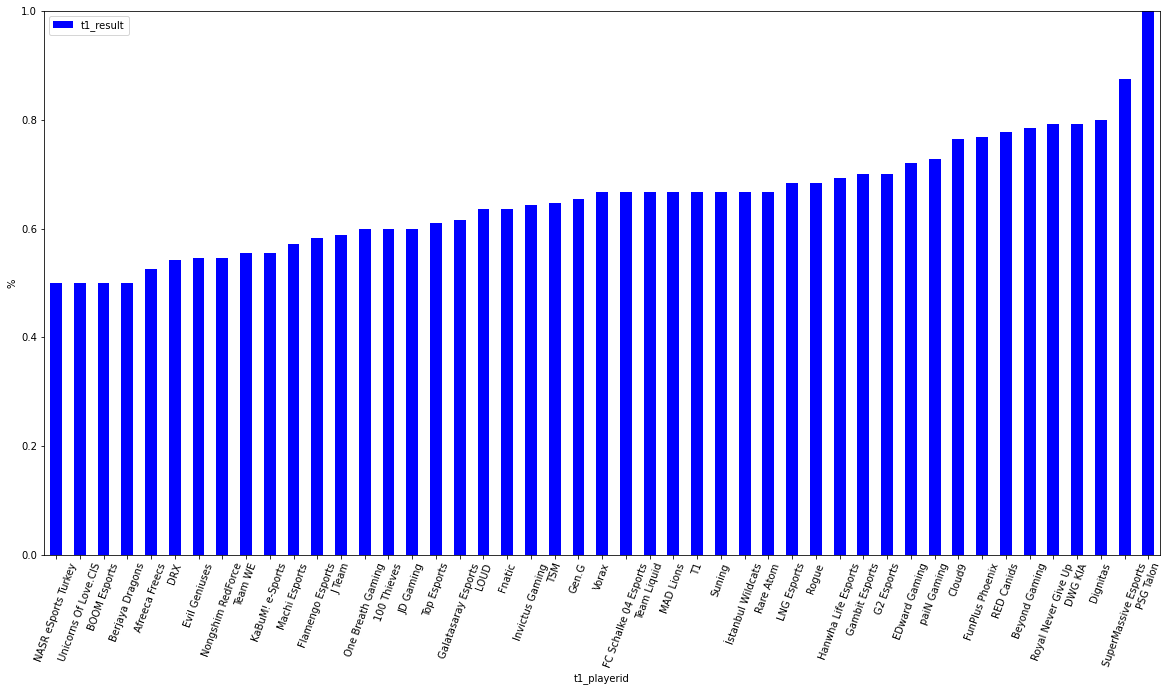

In [16]:
fPRObluewrplt = fPRObluewr.plot(kind='bar',figsize=(20,10), color= 'b' )
plt.ylabel("%")
axes = plt.gca()
axes.set_ylim(0, 1)
plt.xticks(rotation=70);
plt.show()

In [17]:
PROaveragewinred = PROdata.groupby('t2_playerid').mean()
PROredwr = pd.DataFrame(PROaveragewinred['t2_result'])
sPROredwr = PROredwr.sort_values(by="t2_result")
sPROredwr

,t2_result
t2_playerid,
Liyab Esports,0.000000
Team AURORA,0.000000
Rogue Warriors,0.000000
Alpha Esports,0.142857
LNG Esports,0.157895
...,...
Beşiktaş Esports,0.833333
Unicorns Of Love.CIS,0.846154
One Breath Gaming,0.857143


In [18]:
fPROredwr= sPROredwr.loc[sPROredwr['t2_result']>=0.5]
fPROredwr

,t2_result
t2_playerid,
100 Thieves,0.500000
Galakticos,0.500000
T1,0.500000
RED Canids,0.500000
Misfits Gaming,0.500000
Invictus Gaming,0.538462
Galatasaray Esports,0.545455
paiN Gaming,0.562500
Excel Esports,0.571429


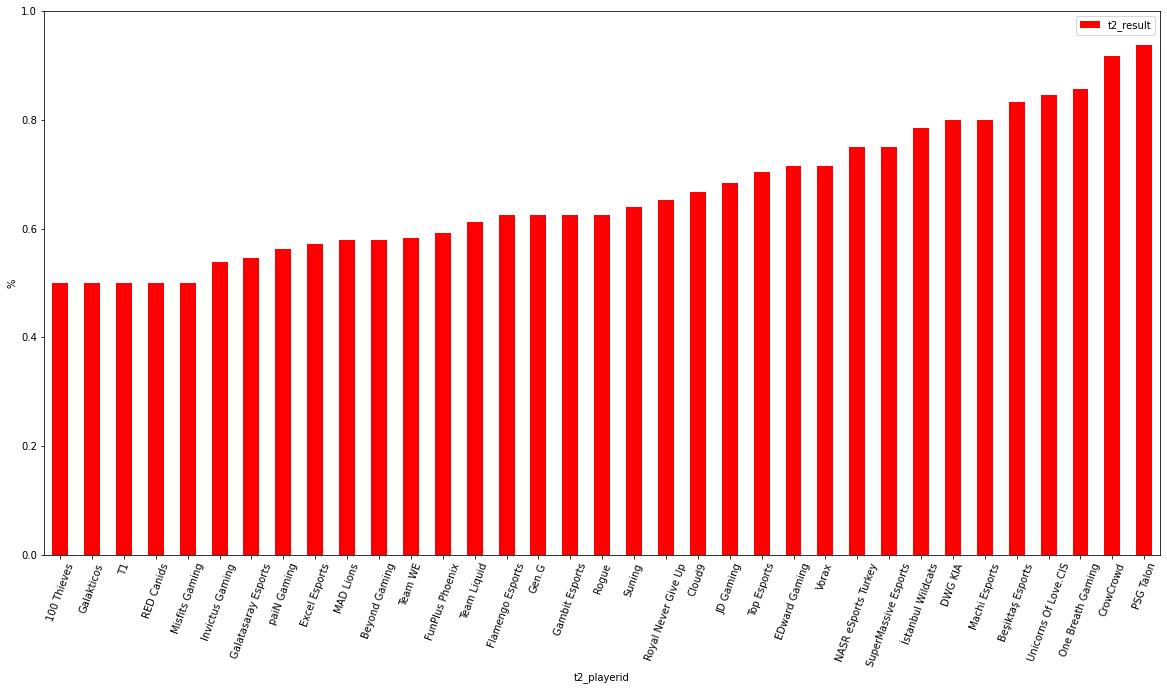

In [19]:
fPROredwrplt = fPROredwr.plot(kind='bar',figsize=(20,10), color= 'r' )
plt.ylabel("%")
axes = plt.gca()
axes.set_ylim(0, 1)
plt.xticks(rotation=70);
plt.show()

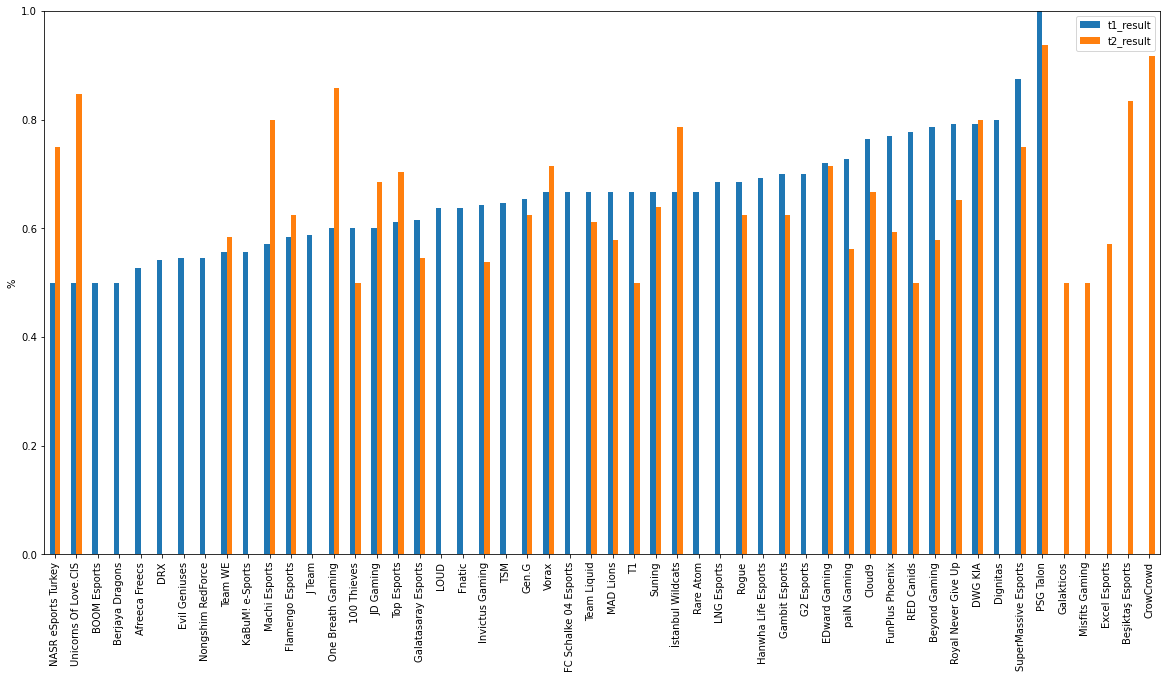

In [20]:
PROwr = pd.concat([fPRObluewr,fPROredwr], axis=1)
PROwr.plot(kind='bar',figsize=(20,10))
plt.ylabel("%")
axes = plt.gca()
axes.set_ylim(0, 1)
plt.show()

In [21]:
fPROwr = PROwr[(PROwr['t1_result']>0.5)&(PROwr['t2_result']>0.5)]

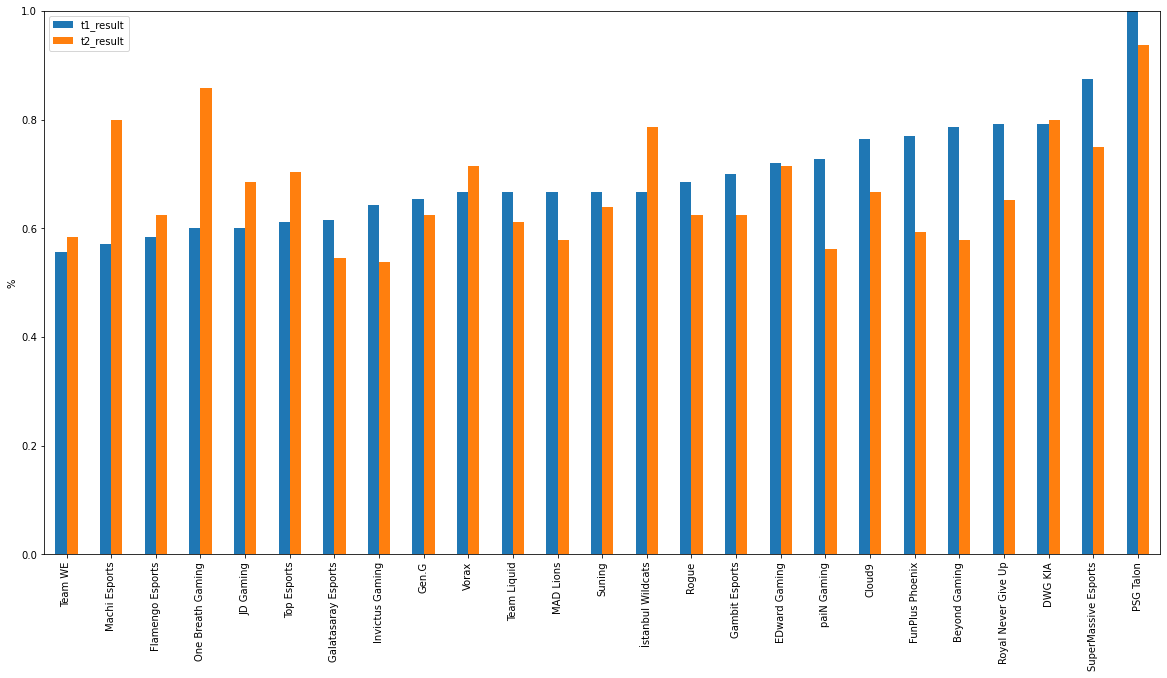

In [22]:
fPROwr.plot(kind='bar',figsize=(20,10))
plt.ylabel("%")
axes = plt.gca()
axes.set_ylim(0, 1)
plt.show()

In [23]:
fPROwr.shape

(25, 2)

In [24]:
fPROwr

,t1_result,t2_result
Team WE,0.555556,0.583333
Machi Esports,0.571429,0.800000
Flamengo Esports,0.583333,0.625000
One Breath Gaming,0.600000,0.857143
JD Gaming,0.600000,0.684211
Top Esports,0.611111,0.703704
Galatasaray Esports,0.615385,0.545455
Invictus Gaming,0.642857,0.538462
Gen.G,0.653846,0.625000
Vorax,0.666667,0.714286


In [65]:
fPROwr['total_result']= (fPROwr.t1_result + fPROwr.t2_result)/2
fPROwr

,t1_result,t2_result,total_result
Team WE,0.555556,0.583333,0.569444
Machi Esports,0.571429,0.800000,0.685714
Flamengo Esports,0.583333,0.625000,0.604167
One Breath Gaming,0.600000,0.857143,0.728571
JD Gaming,0.600000,0.684211,0.642105
Top Esports,0.611111,0.703704,0.657407
Galatasaray Esports,0.615385,0.545455,0.580420
Invictus Gaming,0.642857,0.538462,0.590659
Gen.G,0.653846,0.625000,0.639423
Vorax,0.666667,0.714286,0.690476


In [66]:
fPROwr.to_excel('prowinrate_total.xlsx')

In [25]:
PROwr.to_excel('prowr.xls')

In [26]:
fPROwr.to_csv('prowinrate.csv')

In [27]:
fPROwr.to_excel('prowinrate.xlsx')

A partir de este análisis, vamos a escoger cuales son los equipos con mejor ratio KD


In [28]:
LPLstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='LPL']
LECstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='LEC']
LCSstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='LCS']
LCKstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='LCK']
CBLOLstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='CBLOL']
TCLstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='TCL']
PCSstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='PCS']
LCLstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='LCL']
LJLstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='LJL']
LLstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='LLA']
OPLstats = df[['league','t1_playerid','t1_kills','t1_deaths','t1_assists','t2_deaths','t2_kills','t2_assists','t2_playerid']].loc[df.league=='OPL']
PROstats= pd.concat([LPLstats, LECstats, LCSstats,LCKstats, TCLstats, CBLOLstats, LCLstats, PCSstats], axis=0)
PROstats

,league,t1_playerid,t1_kills,t1_deaths,t1_assists,t2_deaths,t2_kills,t2_assists,t2_playerid
3,LPL,Top Esports,3.0,9.0,6.0,3.0,9.0,28.0,Suning
4,LPL,Top Esports,16.0,27.0,27.0,17.0,27.0,59.0,Suning
5,LPL,Oh My God,4.0,15.0,9.0,4.0,15.0,35.0,EDward Gaming
6,LPL,EDward Gaming,8.0,18.0,18.0,8.0,18.0,49.0,Oh My God
7,LPL,Oh My God,8.0,16.0,19.0,8.0,16.0,37.0,EDward Gaming
...,...,...,...,...,...,...,...,...,...
4097,PCS,Machi Esports,22.0,15.0,55.0,22.0,15.0,31.0,Beyond Gaming
4101,PCS,Beyond Gaming,14.0,6.0,36.0,14.0,6.0,11.0,Machi Esports
4117,PCS,PSG Talon,23.0,9.0,52.0,23.0,9.0,22.0,Beyond Gaming
4119,PCS,PSG Talon,20.0,10.0,54.0,20.0,10.0,28.0,Beyond Gaming


In [29]:
PROstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 3 to 4120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   league       1190 non-null   object 
 1   t1_playerid  1190 non-null   object 
 2   t1_kills     1190 non-null   float64
 3   t1_deaths    1190 non-null   float64
 4   t1_assists   1190 non-null   float64
 5   t2_deaths    1190 non-null   float64
 6   t2_kills     1190 non-null   float64
 7   t2_assists   1190 non-null   float64
 8   t2_playerid  1190 non-null   object 
dtypes: float64(6), object(3)
memory usage: 93.0+ KB


In [30]:
PROstats.to_csv('prostats.csv')

In [31]:
PRObluekda = PROstats.groupby('t1_playerid').mean()
PROkdablue = pd.DataFrame(PRObluekda[['t1_kills','t1_deaths','t1_assists']])
sPROkdablue = PROkdablue.sort_values(by="t1_kills")
sPROkdablue

,t1_kills,t1_deaths,t1_assists
t1_playerid,,,
Golden Guardians,6.000000,14.888889,15.111111
RoX,6.142857,15.142857,17.428571
Vega Squadron,6.142857,15.285714,14.714286
Oh My God,8.076923,16.846154,18.153846
FURIA Esports,8.125000,14.250000,17.875000
...,...,...,...
MAD Lions,17.083333,12.666667,42.416667
Cloud9,17.117647,10.352941,42.000000
PSG Talon,18.166667,7.083333,43.250000


In [32]:
fPROkdablue = sPROkdablue[(sPROkdablue['t1_kills']>15) & (sPROkdablue['t1_assists']>35)]
fPROkdablue

,t1_kills,t1_deaths,t1_assists
t1_playerid,,,
FunPlus Phoenix,15.307692,11.346154,36.846154
Dignitas,15.800000,10.600000,40.000000
Hanwha Life Esports,15.923077,12.153846,35.192308
LOUD,16.000000,14.000000,39.545455
One Breath Gaming,16.200000,11.200000,39.500000
paiN Gaming,16.272727,12.545455,35.454545
Royal Never Give Up,16.500000,11.125000,40.583333
Vorax,16.555556,10.444444,38.777778
G2 Esports,16.650000,13.650000,38.150000


In [33]:
PROredkda = PROstats.groupby('t2_playerid').mean()
PROkdared = pd.DataFrame(PROredkda[['t2_kills','t2_deaths','t2_assists']])
sPROkdared = PROkdared.sort_values(by="t2_kills")
sPROkdared

,t2_kills,t2_deaths,t2_assists
t2_playerid,,,
Team AURORA,5.142857,17.714286,12.857143
Liyab Esports,6.375000,16.625000,11.250000
LGD Gaming,7.200000,13.600000,15.933333
Rogue Warriors,7.333333,17.400000,18.066667
Golden Guardians,7.500000,14.166667,19.500000
...,...,...,...
İstanbul Wildcats,18.071429,11.571429,44.285714
Beşiktaş Esports,18.166667,13.333333,43.500000
PSG Talon,18.375000,5.812500,40.250000


In [34]:
fPROkdared = sPROkdared[(sPROkdared['t2_kills']>15) & (sPROkdared['t2_assists']>35)]
fPROkdared

,t2_kills,t2_deaths,t2_assists
t2_playerid,,,
MAD Lions,15.052632,14.684211,35.684211
Royal Never Give Up,15.652174,11.347826,37.130435
Vorax,15.857143,10.285714,40.857143
JD Gaming,16.000000,12.894737,38.631579
CrowCrowd,16.166667,8.166667,42.416667
DWG KIA,16.760000,11.840000,39.840000
Top Esports,17.666667,11.296296,38.037037
SuperMassive Esports,17.916667,12.416667,46.916667
İstanbul Wildcats,18.071429,11.571429,44.285714


In [35]:
PROkda = pd.concat([fPROkdablue,fPROkdared], axis=1)
PROkda

,t1_kills,t1_deaths,t1_assists,t2_kills,t2_deaths,t2_assists
FunPlus Phoenix,15.307692,11.346154,36.846154,NaN,NaN,NaN
Dignitas,15.800000,10.600000,40.000000,NaN,NaN,NaN
Hanwha Life Esports,15.923077,12.153846,35.192308,NaN,NaN,NaN
LOUD,16.000000,14.000000,39.545455,NaN,NaN,NaN
One Breath Gaming,16.200000,11.200000,39.500000,NaN,NaN,NaN
paiN Gaming,16.272727,12.545455,35.454545,NaN,NaN,NaN
Royal Never Give Up,16.500000,11.125000,40.583333,15.652174,11.347826,37.130435
Vorax,16.555556,10.444444,38.777778,15.857143,10.285714,40.857143
G2 Esports,16.650000,13.650000,38.150000,NaN,NaN,NaN
Suning,16.666667,11.444444,39.277778,NaN,NaN,NaN


In [36]:
PROkdat = PROkda.dropna(thresh=4)

In [37]:
PROkdat

,t1_kills,t1_deaths,t1_assists,t2_kills,t2_deaths,t2_assists
Royal Never Give Up,16.500000,11.125000,40.583333,15.652174,11.347826,37.130435
Vorax,16.555556,10.444444,38.777778,15.857143,10.285714,40.857143
MAD Lions,17.083333,12.666667,42.416667,15.052632,14.684211,35.684211
PSG Talon,18.166667,7.083333,43.250000,18.375000,5.812500,40.250000
SuperMassive Esports,18.250000,10.750000,44.125000,17.916667,12.416667,46.916667


In [54]:
PROkdat['total_kills']= (PROkdat.t1_kills + PROkdat.t2_kills)/2

In [56]:
PROkdat['total_deaths']= (PROkdat.t1_deaths + PROkdat.t2_deaths)/2

In [58]:
PROkdat['total_assists']= (PROkdat.t1_assists + PROkdat.t2_assists)/2

In [60]:
PROkdat.to_excel('prokdatotal.xlsx')

In [59]:
PROkdat

,t1_kills,t1_deaths,t1_assists,t2_kills,t2_deaths,t2_assists,total_kills,total_deaths,total_assists
Royal Never Give Up,16.500000,11.125000,40.583333,15.652174,11.347826,37.130435,16.076087,11.236413,38.856884
Vorax,16.555556,10.444444,38.777778,15.857143,10.285714,40.857143,16.206349,10.365079,39.817460
MAD Lions,17.083333,12.666667,42.416667,15.052632,14.684211,35.684211,16.067982,13.675439,39.050439
PSG Talon,18.166667,7.083333,43.250000,18.375000,5.812500,40.250000,18.270833,6.447917,41.750000
SuperMassive Esports,18.250000,10.750000,44.125000,17.916667,12.416667,46.916667,18.083333,11.583333,45.520833


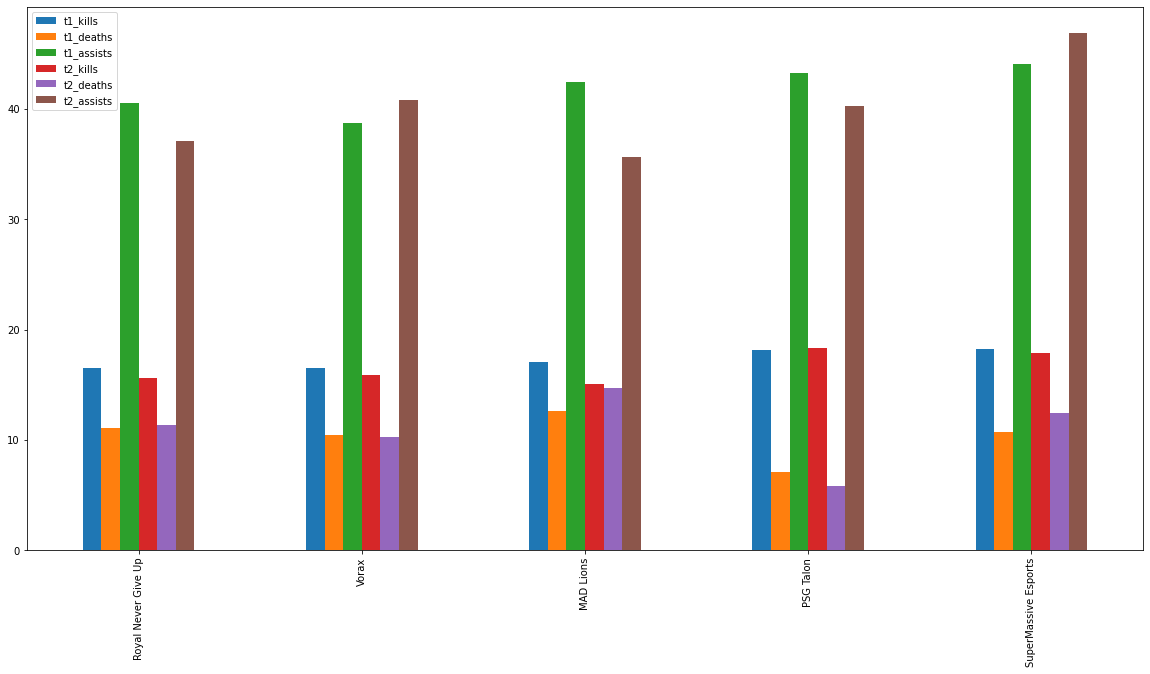

In [38]:
PROkdat.plot(kind='bar',figsize=(20,10));


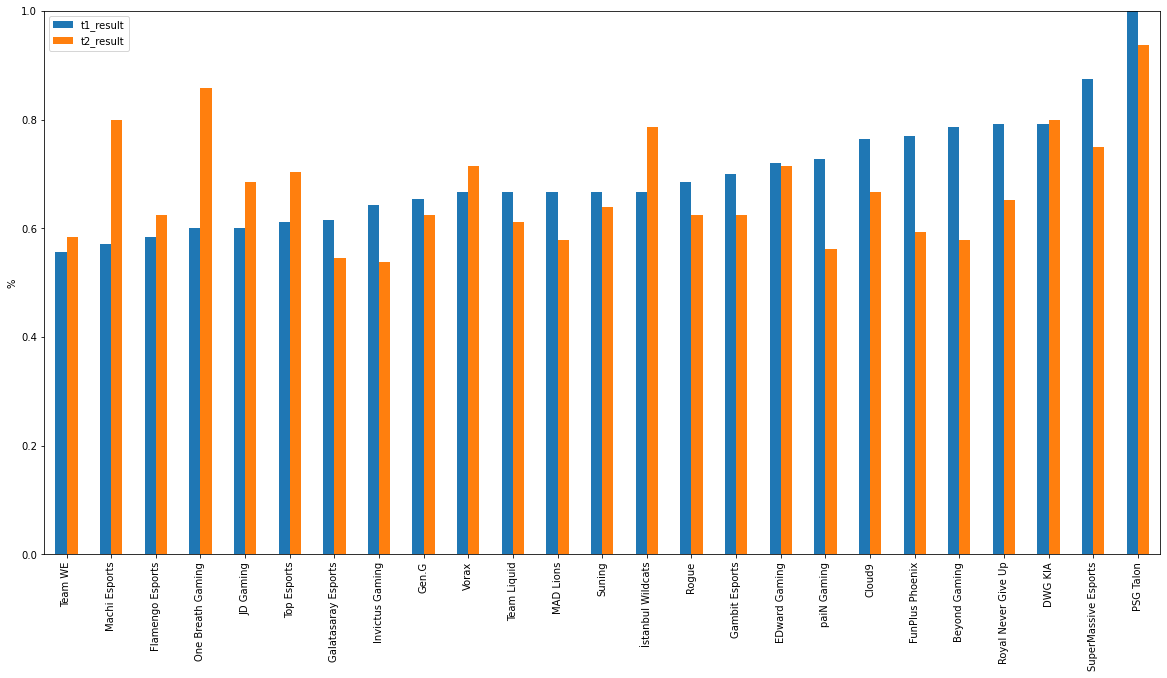

In [39]:
fPROwr.plot(kind='bar',figsize=(20,10))
plt.ylabel("%")
axes = plt.gca()
axes.set_ylim(0, 1)
plt.show()

In [40]:
PROkdat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Royal Never Give Up to SuperMassive Esports
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   t1_kills    5 non-null      float64
 1   t1_deaths   5 non-null      float64
 2   t1_assists  5 non-null      float64
 3   t2_kills    5 non-null      float64
 4   t2_deaths   5 non-null      float64
 5   t2_assists  5 non-null      float64
dtypes: float64(6)
memory usage: 280.0+ bytes


In [41]:
PROkdat.to_csv('prokda.csv')

In [42]:
PROkdat.to_excel('prokda.xlsx')

In [43]:
LPLk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='LPL']
LECk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='LEC']
LCSk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='LCS']
LCKk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='LCK']
CBLOLk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='CBLOL']
TCLk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='TCL']
PCSk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='PCS']
LCLk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='LCL']
LJLk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='LJL']
LLk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='LLA']
OPLk = df[['league','t1_playerid','t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills','t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills','t2_playerid']].loc[df.league=='OPL']
PROk= pd.concat([LPLk, LECk, LCSk,LCKk, TCLk, CBLOLk, LCLk, PCSk], axis=0)
PROk

,league,t1_playerid,t1_doublekills,t1_triplekills,t1_quadrakills,t1_pentakills,t2_doublekills,t2_triplekills,t2_quadrakills,t2_pentakills,t2_playerid
3,LPL,Top Esports,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Suning
4,LPL,Top Esports,2.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,Suning
5,LPL,Oh My God,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,EDward Gaming
6,LPL,EDward Gaming,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Oh My God
7,LPL,Oh My God,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,EDward Gaming
...,...,...,...,...,...,...,...,...,...,...,...
4097,PCS,Machi Esports,4.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,Beyond Gaming
4101,PCS,Beyond Gaming,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Machi Esports
4117,PCS,PSG Talon,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Beyond Gaming
4119,PCS,PSG Talon,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Beyond Gaming


In [44]:
PRObluek= PROk.groupby('t1_playerid').count()
PROkblue = pd.DataFrame(PRObluek[['t1_doublekills','t1_triplekills','t1_quadrakills','t1_pentakills']])
sPROkblue = PROkblue.sort_values(by="t1_doublekills")
sPROkblue

,t1_doublekills,t1_triplekills,t1_quadrakills,t1_pentakills
t1_playerid,,,,
Galakticos,4,4,4,4
Dignitas,5,5,5,5
Immortals,5,5,5,5
RoX,7,7,7,7
Cruzeiro eSports,7,7,7,7
...,...,...,...,...
Gen.G,26,26,26,26
Hanwha Life Esports,26,26,26,26
Team WE,27,27,27,27


In [45]:
PROredk= PROk.groupby('t2_playerid').count()
PROkred = pd.DataFrame(PROredk[['t2_doublekills','t2_triplekills','t2_quadrakills','t2_pentakills']])
sPROkred = PROkred.sort_values(by="t2_doublekills")
sPROkred

,t2_doublekills,t2_triplekills,t2_quadrakills,t2_pentakills
t2_playerid,,,,
5 Ronin,5,5,5,5
Beşiktaş Esports,6,6,6,6
Counter Logic Gaming,6,6,6,6
Golden Guardians,6,6,6,6
Excel Esports,7,7,7,7
...,...,...,...,...
Oh My God,26,26,26,26
Invictus Gaming,26,26,26,26
DRX,27,27,27,27


In [46]:
PROk = pd.concat([sPROkblue,sPROkred], axis=1)

In [47]:
PROk = PROk[PROk['t2_pentakills']>20]

In [48]:
PROk
PROk 

,t1_doublekills,t1_triplekills,t1_quadrakills,t1_pentakills,t2_doublekills,t2_triplekills,t2_quadrakills,t2_pentakills
Oh My God,13,13,13,13,26,26,26,26
Invictus Gaming,14,14,14,14,26,26,26,26
Bilibili Gaming,14,14,14,14,23,23,23,23
Top Esports,18,18,18,18,27,27,27,27
Suning,18,18,18,18,25,25,25,25
Afreeca Freecs,19,19,19,19,23,23,23,23
Nongshim RedForce,22,22,22,22,25,25,25,25
DRX,24,24,24,24,27,27,27,27
DWG KIA,24,24,24,24,25,25,25,25
Royal Never Give Up,24,24,24,24,23,23,23,23


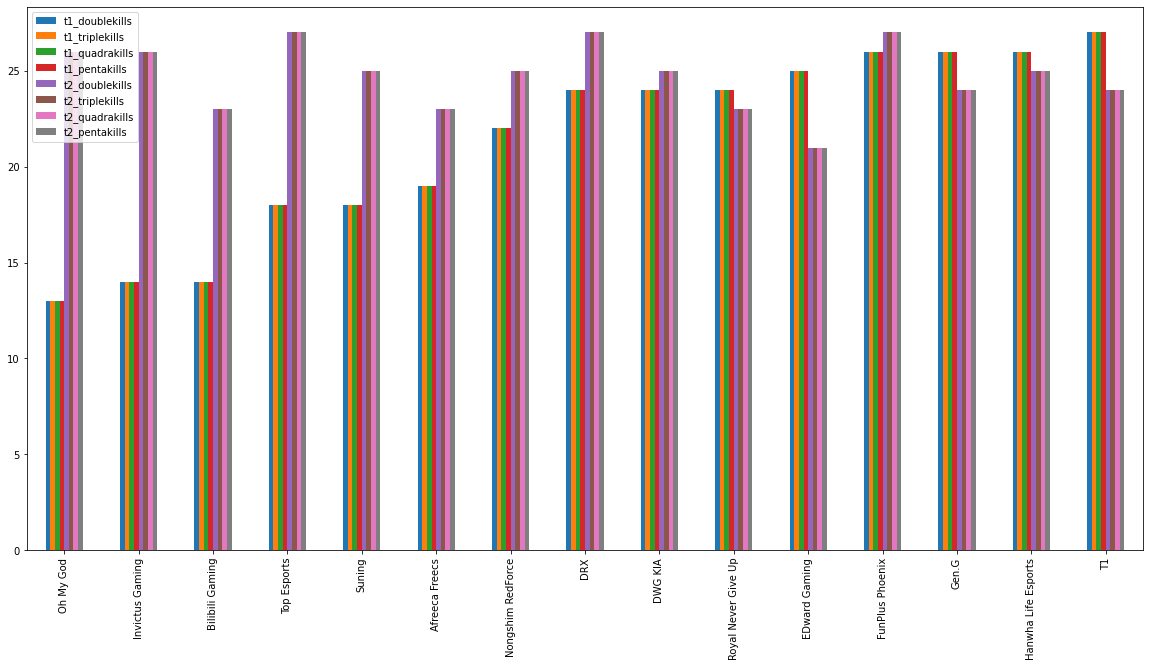

In [49]:
PROk.plot(kind='bar',figsize=(20,10));


In [50]:
PROk.to_excel('killers.xlsx')

In [61]:
PROk['total_doublekills']= (PROk.t1_doublekills + PROk.t2_doublekills)/2
PROk['total_triplekills']= (PROk.t1_triplekills + PROk.t2_triplekills)/2
PROk['total_quadrakills']= (PROk.t1_quadrakills + PROk.t2_quadrakills)/2
PROk['total_pentakills']= (PROk.t1_pentakills + PROk.t2_pentakills)/2


In [63]:
PROk.to_excel('killerstotal.xlsx')